In [1]:
import pandas as pd
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load data from Excel sheet
excel_file_path = r'C:\Users\anush\Downloads\category.xlsx'
df = pd.read_excel(excel_file_path)

# Create a mapping between image file names and categories
image_file_to_category = dict(zip(df['Photo'], df['Category']))

# Load images and their corresponding labels
image_data = []
labels = []
images_folder = r'C:\Users\anush\Downloads\images\Photos_Walking Audit'
for image_file in os.listdir(images_folder):
    if image_file in image_file_to_category:
        image_path = os.path.join(images_folder, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224))  # Resize image to (224, 224) or any other desired size
        image = image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
        image_data.append(image)
        labels.append(image_file_to_category[image_file])

# Convert lists to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(image_data, labels, test_size=0.2, random_state=42)

In [2]:
train_data


array([[[[1.        , 0.99607843, 0.99215686],
         [0.99607843, 0.99607843, 0.99215686],
         [0.99215686, 0.9843137 , 0.98039216],
         ...,
         [0.8352941 , 0.76862746, 0.7176471 ],
         [0.8352941 , 0.76862746, 0.7176471 ],
         [0.83137256, 0.7647059 , 0.7137255 ]],

        [[1.        , 0.9882353 , 0.9843137 ],
         [0.9372549 , 0.9254902 , 0.92156863],
         [0.99607843, 0.99215686, 0.9882353 ],
         ...,
         [0.8352941 , 0.76862746, 0.7176471 ],
         [0.8352941 , 0.76862746, 0.7176471 ],
         [0.8392157 , 0.77254903, 0.72156864]],

        [[0.9843137 , 0.98039216, 0.9764706 ],
         [0.6901961 , 0.6392157 , 0.6431373 ],
         [0.98039216, 0.9843137 , 0.98039216],
         ...,
         [0.8392157 , 0.77254903, 0.72156864],
         [0.8392157 , 0.77254903, 0.72156864],
         [0.8392157 , 0.77254903, 0.72156864]],

        ...,

        [[0.5568628 , 0.60784316, 0.6392157 ],
         [0.56078434, 0.6117647 , 0.6431373 ]

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


num_categories = 5 
model.add(Dense(num_categories, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [4]:

from tensorflow.keras.utils import to_categorical
categories = ['Footpath Quality', 'Waste', 'Obstruction', 'Unsafe Zone','Encroachment']

for i in range (len(train_labels)):
    train_labels[i] = categories.index(train_labels[i])
num_categories = 5
train_labels_encoded = to_categorical(train_labels, num_categories)


batch_size = 32
epochs = 50


history = model.fit(train_data, train_labels_encoded, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/50
12/12 [==============================] - 26s 2s/step - loss: 1.9121 - accuracy: 0.3073 - val_loss: 1.3677 - val_accuracy: 0.3646
Epoch 2/50
12/12 [==============================] - 21s 2s/step - loss: 1.4349 - accuracy: 0.3411 - val_loss: 1.4169 - val_accuracy: 0.4688
Epoch 3/50
12/12 [==============================] - 22s 2s/step - loss: 1.3706 - accuracy: 0.4036 - val_loss: 1.2977 - val_accuracy: 0.4479
Epoch 4/50
12/12 [==============================] - 21s 2s/step - loss: 1.3400 - accuracy: 0.3984 - val_loss: 1.2423 - val_accuracy: 0.4375
Epoch 5/50
12/12 [==============================] - 21s 2s/step - loss: 1.2979 - accuracy: 0.4271 - val_loss: 1.2740 - val_accuracy: 0.4375
Epoch 6/50
12/12 [==============================] - 22s 2s/step - loss: 1.3006 - accuracy: 0.4688 - val_loss: 1.1525 - val_accuracy: 0.4583
Epoch 7/50
12/12 [==============================] - 21s 2s/step - loss: 1.1919 - accuracy: 0.4948 - val_loss: 1.1161 - val_accuracy: 0.4688
Epoch 8/50
12/12 [==

In [5]:
x = model.predict(test_data)

4/4 [==============================] - 2s 435ms/step


In [6]:
import numpy as np  
y = []
for i in x:
    y.append(np.argmax(i))
print(len(y))


120


In [7]:

for i in range (len(test_labels)):
    test_labels[i] = categories.index(test_labels[i])

In [8]:
test_labels

array(['4', '1', '4', '0', '2', '0', '0', '4', '0', '0', '0', '4', '2',
       '1', '4', '4', '0', '4', '4', '1', '1', '2', '0', '4', '1', '1',
       '0', '1', '0', '2', '4', '0', '0', '4', '0', '1', '1', '0', '1',
       '0', '4', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0',
       '4', '1', '4', '2', '2', '0', '1', '1', '0', '0', '4', '4', '1',
       '4', '1', '1', '1', '1', '4', '0', '2', '0', '1', '0', '1', '0',
       '1', '2', '4', '2', '0', '1', '4', '1', '1', '1', '1', '0', '4',
       '0', '1', '0', '0', '2', '1', '1', '2', '4', '1', '4', '4', '2',
       '0', '4', '1', '0', '0', '0', '0', '4', '0', '4', '4', '0', '0',
       '0', '1', '0'], dtype='<U16')

In [9]:
y


[4,
 4,
 4,
 2,
 4,
 0,
 0,
 4,
 0,
 4,
 0,
 1,
 4,
 0,
 0,
 4,
 4,
 4,
 4,
 1,
 2,
 4,
 0,
 4,
 4,
 2,
 4,
 1,
 0,
 2,
 4,
 0,
 0,
 4,
 4,
 1,
 1,
 2,
 4,
 0,
 2,
 0,
 4,
 1,
 1,
 0,
 1,
 1,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 2,
 4,
 0,
 4,
 0,
 1,
 1,
 4,
 4,
 2,
 4,
 4,
 0,
 0,
 4,
 4,
 2,
 1,
 0,
 0,
 4,
 1,
 0,
 4,
 2,
 4,
 4,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 4,
 4,
 2,
 4,
 4,
 0,
 2,
 4,
 1,
 4,
 4,
 1,
 4,
 4,
 2,
 0,
 1,
 4,
 0,
 0,
 4,
 1,
 2,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 0]

In [10]:
image_path = r'C:\Users\anush\Desktop\trial.jpg'

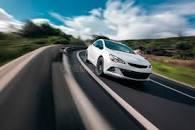

In [11]:
from IPython.display import Image, display
display(Image(filename=image_path))

In [12]:
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))  # Resize image to (224, 224) or any other desired size
image = image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

In [13]:
image_data = []
image_data.append(image)
image_data = np.array(image_data)

In [14]:
x = model.predict(image_data)

1/1 [==============================] - 0s 92ms/step


In [15]:
np.argmax(x)

2

In [16]:
categories[4]

'Encroachment'

In [17]:
image_path = r'C:\Users\anush\Desktop\trial1.jpg'

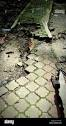

In [18]:
from IPython.display import Image, display
display(Image(filename=image_path))

In [19]:
image = cv2.imread(image_path)
image = cv2.resize(image, (224, 224))  # Resize image to (224, 224) or any other desired size
image = image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

In [20]:
image_data = []
image_data.append(image)
image_data = np.array(image_data)

In [21]:
x = model.predict(image_data)

1/1 [==============================] - 0s 83ms/step


In [27]:
categories[np.argmax(x)]

'Footpath Quality'

In [24]:
model.save("model.h5")